# PART I: Desriptive analysis 
## Section A


## Part A
Create a table that contains information on minimum, average, median, and maximum for the
following: 
* tweet length (#characters and #words) (text column)
* hashtag length (#characters and #words) (hashtags column) 

In [1]:
import pandas as pd
import numpy as np
training = pd.read_excel('training_data.xlsx')
training.shape

(407223, 6)

In [2]:
training.head()

,hashtags,full_text,in_reply_to_screen_name,country_user,gender_user,pol_spec_user
0,feminist AskMeAnything,b'RT @swedennewyork: What does it mean to have...,NaN,sweden,Male,Left
1,NaN,b'Jens Stoltenberg \xc3\xa5pnet virtuelle Rock...,NaN,norway,Male,Left
2,NaN,b'@Panenka_Bart Veel beterschap Bart en Loes! ...,BartDerwael,belgium,Male,Left
3,NaN,b'RT @CarlEmilLind: Tydelige S aftryk: \n\nPsk...,NaN,denmark,Female,Left
4,NaN,b'\xf0\x9f\x98\x83 https://t.co/bpqoZ8Y4wm',NaN,sweden,Male,Left


#### Tweet length

In [3]:
# first, encoding errors and byte strings are removed
training['full_text_strip'] = training['full_text'].apply(lambda x: x[2:-1].encode('utf-8').decode('unicode_escape'))

In [4]:
'''
making two new features: 
    -full_text_chars: integer, number of characters after stripping the tweet
    -full_text_words: integer, number of words in the tweet
'''

# make all lowercase for consistency 
training['full_text'] = training['full_text'].str.lower()

# making columns for number of characters and number of words 
training['tweet_char_len'] = training['full_text_strip'].str.len()

# splitting based on space, then counting the length of the split list = the number of words
training['tweet_word_len'] = [len(i.split()) for i in training.full_text_strip]


#### Hastag length

In [5]:
training['hashtag_count'] = training['hashtags'].apply(lambda x: 
                                                     len(x.split()) if type(x) == str else 0)

In [6]:
'''
Making three new features: 
    -ht_count: integer, count of the number of hashtags in the hashtags column 
    -ht_lengths: list, where each value is the length of each hashtag
    -ht_list: list, where each value is the string of each hashtag
'''
ht_lengths = [] 
ht_list = [] # this will be used for part B, making the pie charts! 
training['hashtags'] = training['hashtags'].astype('str')

for hts in training.hashtags:
    if hts != 'none':
        # making all hashtags lowercase, and transforming the string of hashtags
        # into a list of hashtags
        ht_list.append(hts.lower().split())        
        # keeping track of the length of each hashtag 
        lengths = []
        for tag in hts.lower().split():
            lengths.append(len(tag))
        
        ht_lengths.append(lengths)
        
    else:
        ht_lengths.append(None)
        ht_list.append(None)

training['hashtag_lengths'] = ht_lengths
training['hashtag_list'] = ht_list

#### Summary table

In [7]:
# pandas describe() summary table will provide the mean, median, min, and max for tweet length and 
# hashtag count. since i have hashtag lengths stored into a list i will need to get this info seperately
summary = training[['tweet_word_len', 'tweet_char_len', 'hashtag_count']].describe()

In [8]:
# getting mean, meadian, min, max for hashtag lengths 
from statistics import median

all_lengths = []
for lengths in training.hashtag_lengths:
    if lengths: 
        all_lengths += lengths 

ht_l_mean = sum(all_lengths) / len(all_lengths)
ht_l_min = min(all_lengths)
ht_l_max = max(all_lengths)
ht_l_median = median(all_lengths)

In [9]:
from tabulate import tabulate

table = {' ': ['Mean', 'Min', 'Median', 'Max'], 
         'Tweet length (characters)': [summary['tweet_char_len']['mean'],
                                       summary['tweet_char_len']['min'],
                                       summary['tweet_char_len']['50%'],
                                       summary['tweet_char_len']['max']], 
         'Tweet length (number of words)':[summary['tweet_word_len']['mean'], 
                                           summary['tweet_word_len']['min'],
                                           summary['tweet_word_len']['50%'],
                                           summary['tweet_word_len']['max']],
         'Number of hastags':[summary['hashtag_count']['mean'], 
                              summary['hashtag_count']['min'],
                              summary['hashtag_count']['50%'],
                              summary['hashtag_count']['max']],
        'Hashtag length': [ht_l_mean, ht_l_min, ht_l_median, ht_l_max]}

print('Tweet & Hashtag Summary'.upper())
print(tabulate(table, headers='keys'))

TWEET & HASHTAG SUMMARY
          Tweet length (characters)    Tweet length (number of words)    Number of hastags    Hashtag length
------  ---------------------------  --------------------------------  -------------------  ----------------
Mean                        144.178                           20.2973             0.492197           5.32054
Min                           1                                1                  0                  1
Median                      142                               20                  0                  3
Max                         870                               89                 16                 87


## Part B
Find the top ten most commonly used hashtags (hashtags column) in each country separately.
Then, create pie charts (one pie chart per country) which show the distribution of these ten most
commonly used hashtags for each country. Do you observe any patterns? What are the meanings
/ interpretations of the hashtags you have identified? Write your findings in the report. 

In [10]:
training['hashtags'].replace({'': np.nan}, inplace=True)
training['hashtags']

0         feminist AskMeAnything
1                            nan
2                            nan
3                            nan
4                            nan
                   ...          
407218                       nan
407219                       nan
407220                     dkpol
407221                       nan
407222                       nan
Name: hashtags, Length: 407223, dtype: object

In [11]:

training['hashtags_split'] = training['hashtags'].apply(lambda x: 
                                                        x.split() if x != 'nan' else [])

In [12]:
hashtag_df = training.explode('hashtags_split')
hashtags_count = hashtag_df.groupby(['country_user', 'hashtags_split']).size().reset_index(name='count')

In [13]:
top_10_hashtags = hashtags_count.groupby('country_user').apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)
top_10_hashtags['total_count'] = top_10_hashtags.groupby('country_user')['count'].transform('sum')
top_10_hashtags['percentage'] = (top_10_hashtags['count'] / top_10_hashtags['total_count']) * 100
top_10_hashtags

,country_user,hashtags_split,count,total_count,percentage
0,belgium,begov,1291,4486,28.778422
1,belgium,COVID19,752,4486,16.763263
2,belgium,EU,382,4486,8.515381
3,belgium,RuleOfLaw,348,4486,7.757468
4,belgium,Wallonie,335,4486,7.467677
...,...,...,...,...,...
65,sweden,bopol,260,4248,6.120527
66,sweden,MigrationEU,212,4248,4.990584
67,sweden,EU,198,4248,4.661017
68,sweden,pldebatt,178,4248,4.190207


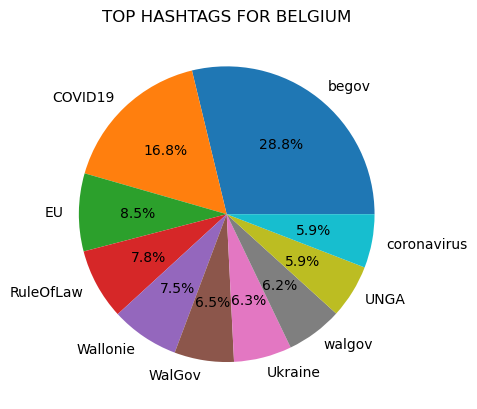

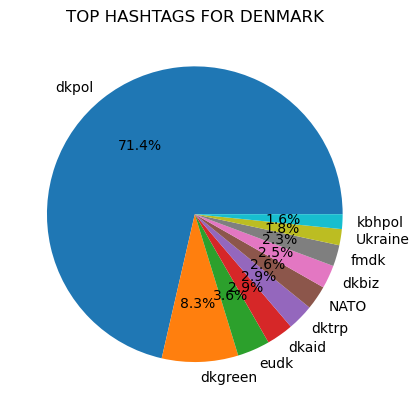

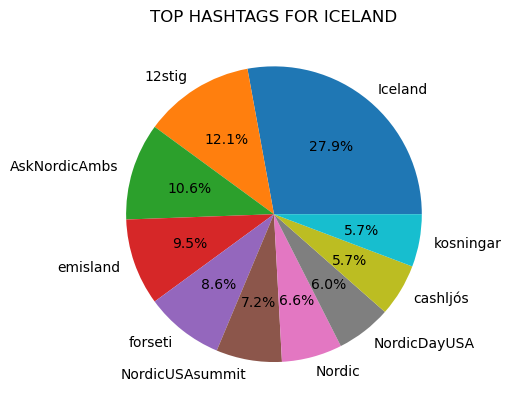

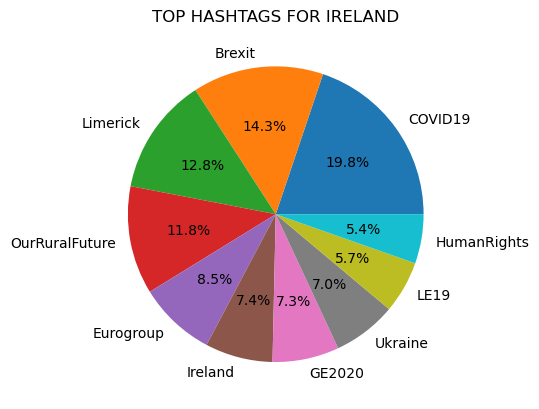

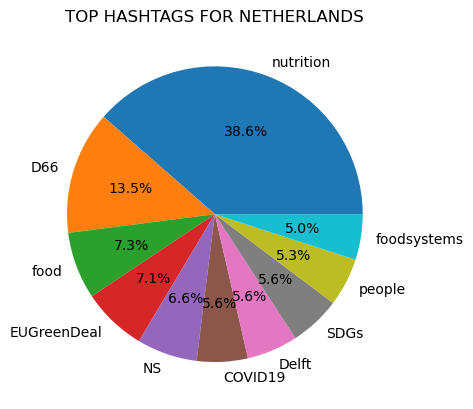

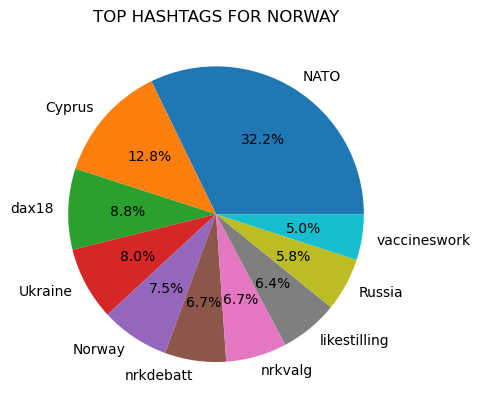

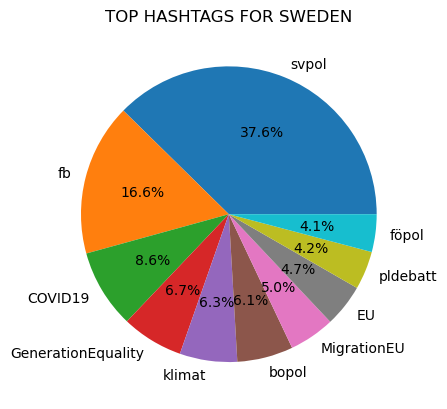

In [14]:
# making the pies 
import matplotlib.pyplot as plt

countries = [c for c in top_10_hashtags.country_user.unique()]

for country in countries: 
    
    df = top_10_hashtags[top_10_hashtags['country_user'] == country]
    
    counts = df['count']
    tags = df['hashtags_split']

    plt.pie(counts, labels=tags, autopct='%.1f%%')
    plt.title(f'Top hashtags for {country}'.upper())
    plt.savefig(f'{country}_hashtags.png', transparent=True)
    plt.show()


## Part C 
Create a stacked bar chart (one stacked bar per country) that shows the percentage of political
views associated with each country. [Create normalized bars to show percentages: minimum
should be 0, maximum should be 1 (or 0% and 100%)]. Interpret your findings. Add your findings
and the graphs to the report.

In [15]:
# making dataframe of political spectrum counts grouped by country 
left = training[training['pol_spec_user'] == 'Left'].groupby('country_user').pol_spec_user.describe()['count']
right = training[training['pol_spec_user'] == 'Right'].groupby('country_user').pol_spec_user.describe()['count']
center = training[training['pol_spec_user'] == 'Center'].groupby('country_user').pol_spec_user.describe()['count']
ind = training[training['pol_spec_user'] == 'Independent'].groupby('country_user').pol_spec_user.describe()['count']

# transferring to dataframe for easier plotting
df = pd.DataFrame()
df['left'] = left
df['right'] = right
df['center'] = center
df['independent'] = ind

#repalcing NaN with 0 
df = df.fillna(0)

# normalizing the values to 0-100%
df['left_n'] = 100 * df['left'] / (df['left'] + df['right'] + df['center'] + df['independent'])
df['right_n'] = 100 * df['right'] / (df['left'] + df['right'] + df['center'] + df['independent'])
df['center_n'] = 100 * df['center'] / (df['left'] + df['right'] + df['center'] + df['independent'])
df['ind_n'] = 100 * df['independent'] / (df['left'] + df['right'] + df['center'] + df['independent'])

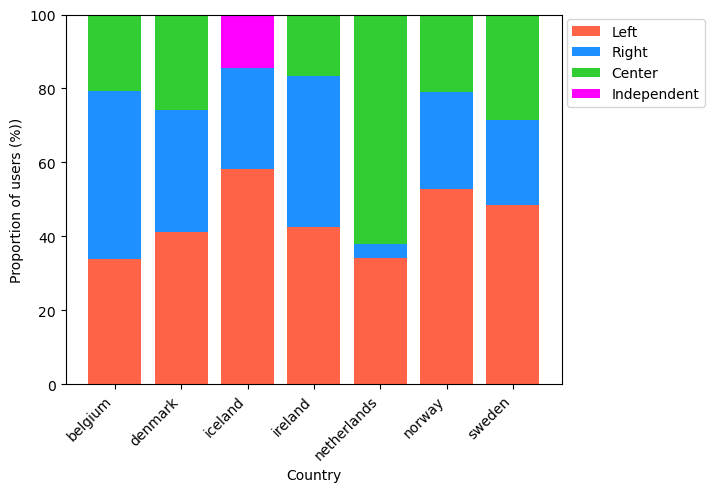

In [16]:
# plotting stacked bar
plt.bar(df.index, df.left_n, color='tomato', label = 'Left')
plt.bar(df.index, df.right_n, color='dodgerblue', label = 'Right', bottom = df.left_n)
plt.bar(df.index, df.center_n, color='limegreen', label = 'Center', bottom = df.left_n + df.right_n)
plt.bar(df.index, df.ind_n, color='magenta', label = 'Independent', bottom = df.left_n + df.right_n + df.center_n)
plt.xticks(rotation=45, ha='right')
plt.legend(loc=(1.01,.75))
plt.ylabel('Proportion of users (%))')
plt.xlabel('Country')
plt.ylim([0, 100])
plt.savefig('pol_views.png',bbox_inches='tight')
plt.show()

## Part D 
Create a stacked bar chart that shows the distribution of genders by country. [Create normalized
bars to show percentages: minimum should be 0, maximum should be 1 (or 0% and 100%)].
Interpret your findings. Add your findings and the graphs to the report. (5 points) (2.5 points for
graduate students)

In [17]:
# making datagrame for count of men and women grouped by country
male = training[training['gender_user'] == 'Male'].groupby('country_user').gender_user.describe()['count']
female = training[training['gender_user'] == 'Female'].groupby('country_user').gender_user.describe()['count']

df['M'] = male
df['F'] = female

# normalizing male and female 
df['M_n'] = 100*df['M'] / (df['M'] + df['F']) 
df['F_n'] = 100*df['F'] / (df['M'] + df['F']) 

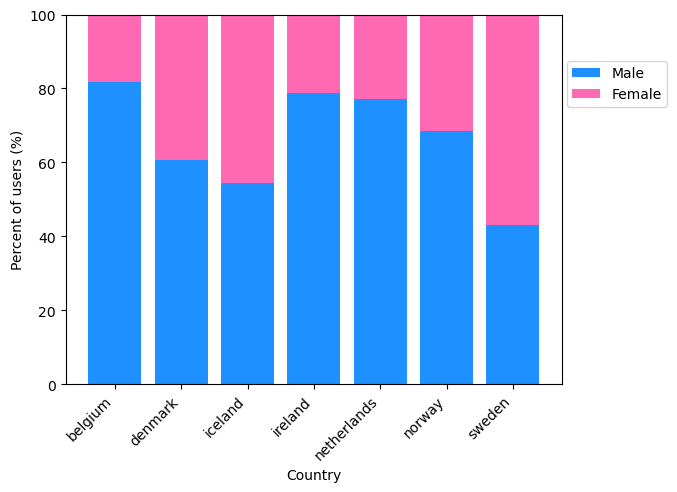

In [18]:
# making stacked bar 
plt.bar(df.index, df.M_n, color='dodgerblue', label = 'Male')
plt.bar(df.index, df.F_n, color='hotpink', label = 'Female', bottom = df.M_n)
plt.xticks(rotation=45, ha='right')
plt.legend(loc=(1.01,.75))
plt.ylabel('Percent of users (%)')
plt.xlabel('Country')
plt.ylim([0, 100])
plt.savefig('gender.png', bbox_inches='tight')
plt.show()

In [19]:
# overall gender distribution 
training['gender_user'].value_counts()

gender_user
Male      269821
Female    137402
Name: count, dtype: int64

# PART I: Section B 

## Part A
Write a ‘text cleaner’ function that does the following in the full_text column: 
*  remove stopwords 
*  remove all words that are shorter than 3 characters
*  remove all links (starting with http)
*  remove emojis
* remove punctuation

Attach the code you wrote to the lemmatizer.py file in the project folder. Run the lemmatizer function and create ‘cleaned and lemmatized’ version of text column. (You can name the new column as text_clean). After the cleaning, expand the table you have created in Section A) by calculating minimum, average, median, and maximum for the newly created text_clean column (#characters and #words).

In [15]:
'''
the tweet_cleaner function will take one string of text as the input. 
it will first tokenize the string, then it will remove: 
    -stopwords 
    -words < 3 characters 
    -links starting with http 
    -emojis

Then the tokenized text will be scanned and any punctuation characters will be pulled out. 

The cleaned tokens will be rejoined into one string and returned. 
'''

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re

nltk.download('stopwords')

def tweet_cleaner(text, remove_mentions = False): 
    
    # compile stop words from other languages
    stop_words =  set(stopwords.words('english') + 
                     stopwords.words('swedish') + 
                     stopwords.words('dutch') + 
                     stopwords.words('danish') + 
                     stopwords.words('norwegian') + 
                     stopwords.words('german') + 
                     stopwords.words('french') + 
                     stopwords.words('finnish'))
#     # tokenize 
#     tokens = word_tokenize(text)
    
#     # remove stopwords, links starting with http
#     # make str lowercase
#     tokens = [w.lower() for w in tokens 
#               if ((not w.lower() in stop_words) and 
#                   (not len(w) < 3) and 
#                   (not w.startswith('http')))]
    
#     # remove emoji 
#     tokens = [re.sub(r'[^\x00-\x7F]+','', w) for w in tokens]

#     # remove punctuation 
#     tokens = [re.sub(r'[^\w\s]','', w) for w in tokens]
     
#     # remove anything < 3 characters again, since removing punctuation may 
#     # have shortened the character counts of words 
#     cleaned = [w for w in tokens if len(w) > 2]
    
    # remove stopwords 
    clean_tweet = [word for word in text.split() if word not in stop_words]
    #remove links that start with http
    clean_tweet = [re.sub(r"http\S+", "", word) for word in clean_tweet]
    #remove emojis
    clean_tweet = [re.sub(r'[^\x00-\x7F]+','', word) for word in clean_tweet]
    #remove punctuation
    clean_tweet = [re.sub(r'[^\w\s]','', word) for word in clean_tweet]
    #remove words shorter than 3 characters
    clean_tweet = [word for word in clean_tweet if len(word) > 2]
    
    # rejoin into string and return                                                                         
    return " ".join(clean_tweet)

[nltk_data] Downloading package stopwords to /Users/havu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
# Provided code 
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

##Tags the words in the tweets
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return(wordnet.ADJ)
    elif nltk_tag.startswith('V'):
        return(wordnet.VERB)
    elif nltk_tag.startswith('N'):
        return(wordnet.NOUN)
    elif nltk_tag.startswith('R'):
        return(wordnet.ADV)
    else:          
        return(None)
    
##Lemmatizes the words in tweets and returns the cleaned and lemmatized tweet
def lemmatize_tweet(tweet):
    #tokenize the tweet and find the POS tag for each token
    tweet = tweet_cleaner(tweet) #tweet_cleaner() will be the function you will write
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(tweet))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_tweet = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_tweet.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_tweet.append(lemmatizer.lemmatize(word, tag))
    return(" ".join(lemmatized_tweet))

In [17]:
# lemmatizing + cleaning text 
cleaned = [lemmatize_tweet(training.full_text_strip[i]) for i 
           in range(0, len(training.full_text))]

training['text_clean'] = cleaned
training.to_csv('training_cleaned.csv', index=False) # saving so i don't have to re-run lemmatization 

In [18]:
training['text_clean'] = training['text_clean'].astype(str)

# making columns for number of characters and number of words for lemmatized text
training['text_clean_chars'] = training['text_clean'].str.len()
training['text_clean_words'] = [len(i.split()) for i in training.text_clean]

# getting mean, min, median, max for lemmatized text 
training[['text_clean_chars', 'text_clean_words']].describe()

,text_clean_chars,text_clean_words
count,407223.000000,407223.000000
mean,93.477100,11.803820
std,44.635866,5.773452
min,0.000000,0.000000
25%,67.000000,8.000000
50%,92.000000,11.000000
75%,109.000000,14.000000
max,757.000000,77.000000


In [19]:
'''
Conducting additional text cleaning before lemmatization to remove user mentions.
'''

def determine_user_mentions(tweet): # Determine if tweet contains user mentions
    mention_pattern = r'@(\w+)'
    mention = re.findall(mention_pattern, tweet)
    return bool(mention)

def remove_user_mentions(tweet): # Remove user mentions from tweet
    mention_pattern = r'@(\w+)'
    return re.sub(mention_pattern, '', tweet)

def extract_user_mentions(tweet): # Extract user mentions from tweet and return as a list
    mention_pattern = r'@(\w+)'
    mentions = re.findall(mention_pattern, tweet)
    return mentions if mentions else [] 

training['has_user_mentions'] = training['full_text_strip'].apply(lambda x: 
                                                            determine_user_mentions(x))
training['user_mentions'] = training['full_text_strip'].apply(lambda x: 
                                                        extract_user_mentions(x))
training['full_text_rm'] = training['full_text_strip'].apply(lambda x: 
                                                    remove_user_mentions(x))

In [22]:
# re-running lemmatization on tweets without user mentions 
training['text_clean_rm'] = training['full_text_rm'].apply(lambda x: lemmatize_tweet(x))

## Part B
Using the code in the following link, perform LDA (i) and Non-negative Matrix Factorization (ii)
for topic analysis. Please use the text_clean column you have created above. Set the number of
clusters/topics to 10 (ten) and extract the topics in an unsupervised manner. Adjust any
parameters as you see fit. Analyze the results. Compare the results of both models. Interpret your
findings and add your findings to the report.

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:

'''
Author: Olivier Grisel <olivier.grisel@ensta.org>         
    Lars Buitinck
    Chyi-Kwei Yau <chyikwei.yau@gmail.com>
     License: BSD 3 clause

From: https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html 
'''

from time import time
from sklearn.decomposition import NMF, LatentDirichletAllocation, MiniBatchNMF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 20
batch_size = 128
init = "nndsvda"


def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.savefig(f"{title}.png", bbox_inches='tight')
    plt.show()


# Load the 20 newsgroups dataset and vectorize it. We use a few heuristics
# to filter out useless terms early on: the posts are stripped of headers,
# footers and quoted replies, and common English words, words occurring in
# only one document or in at least 95% of the documents are removed.

# print("Loading dataset...")
# t0 = time()
# data, _ = fetch_20newsgroups(
#     shuffle=True,
#     random_state=1,
#     remove=("headers", "footers", "quotes"),
#     return_X_y=True,
# )
# data_samples = data[:n_samples]
# print("done in %0.3fs." % (time() - t0))

data = training['text_clean']
data_samples = data[:n_samples]

# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))
print()

# Fit the NMF model
print(
    "Fitting the NMF model (Frobenius norm) with tf-idf features, "
    "n_samples=%d and n_features=%d..." % (n_samples, n_features)
)
t0 = time()
nmf = NMF(
    n_components=n_components,
    random_state=1,
    init=init,
    beta_loss="frobenius",
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=1,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))


tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf, tfidf_feature_names, n_top_words, "Topics in NMF model (Frobenius norm)"
)

# Fit the NMF model
print(
    "\n" * 2,
    "Fitting the NMF model (generalized Kullback-Leibler "
    "divergence) with tf-idf features, n_samples=%d and n_features=%d..."
    % (n_samples, n_features),
)
t0 = time()
nmf = NMF(
    n_components=n_components,
    random_state=1,
    init=init,
    beta_loss="kullback-leibler",
    solver="mu",
    max_iter=1000,
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=0.5,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf,
    tfidf_feature_names,
    n_top_words,
    "Topics in NMF model (generalized Kullback-Leibler divergence)",
)

# Fit the MiniBatchNMF model
print(
    "\n" * 2,
    "Fitting the MiniBatchNMF model (Frobenius norm) with tf-idf "
    "features, n_samples=%d and n_features=%d, batch_size=%d..."
    % (n_samples, n_features, batch_size),
)
t0 = time()
mbnmf = MiniBatchNMF(
    n_components=n_components,
    random_state=1,
    batch_size=batch_size,
    init=init,
    beta_loss="frobenius",
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=0.5,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))


tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    mbnmf,
    tfidf_feature_names,
    n_top_words,
    "Topics in MiniBatchNMF model (Frobenius norm)",
)

# Fit the MiniBatchNMF model
print(
    "\n" * 2,
    "Fitting the MiniBatchNMF model (generalized Kullback-Leibler "
    "divergence) with tf-idf features, n_samples=%d and n_features=%d, "
    "batch_size=%d..." % (n_samples, n_features, batch_size),
)
t0 = time()
mbnmf = MiniBatchNMF(
    n_components=n_components,
    random_state=1,
    batch_size=batch_size,
    init=init,
    beta_loss="kullback-leibler",
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=0.5,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    mbnmf,
    tfidf_feature_names,
    n_top_words,
    "Topics in MiniBatchNMF model (generalized Kullback-Leibler divergence)",
)

print(
    "\n" * 2,
    "Fitting LDA models with tf features, n_samples=%d and n_features=%d..."
    % (n_samples, n_features),
)
lda = LatentDirichletAllocation(
    n_components=n_components,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

tf_feature_names = tf_vectorizer.get_feature_names_out()
plot_top_words(lda, tf_feature_names, n_top_words, "Topics in LDA model")

# PART II: MODELING

## Additional EDA

### 1. Class/gender imbalance

In [ ]:
'''
Earlier descriptive analyses revealed an imbalance in gender and political spectrum. 
Looking to see if there is a great imbalance in gender among the different political spectrum views. 

Answer; there isn't an uneven imbalance in gender across the political spectrum. While there are more males 
than females overall, the proportion of men and women is relatively consistent across each political 
spectrum label. 
'''

male_spec = training[training['gender_user'] == 'Male'].pol_spec_user.value_counts()
female_spec = training[training['gender_user'] == 'Female'].pol_spec_user.value_counts()

plt.bar(['Left', 'Right', 'Center', 'Independent'], male_spec, color='dodgerblue', label = 'Male')
plt.bar(['Left', 'Right', 'Center', 'Independent'], female_spec, color='hotpink', label = 'Female', 
        bottom = male_spec)
plt.xticks(rotation=0, ha='center')
plt.title('Male & female users by political spectrum')
plt.savefig('gender_pol_spec.png', bbox_inches='tight')
plt.show()


In [ ]:
training['pol_spec_user'].value_counts()

In [ ]:
703 / len(training)

### 2. Representation of countries

In [ ]:
training['country_user'].value_counts() , training['country_user'].value_counts() / (len(training.country_user))

### 3. Null values 
All null values are either in the `hasthag_lengths`, or `in_reply_to_screen_name` collumns, meaning these tweets aren't replies or don't have hashtags. 

In [ ]:
training.isnull().sum() 

### 4. Investigating in-reply-to-screen name

In [ ]:
''' 
investigating if the in-reply-to-sreenname has an bearing on political specturm, gender, or country of the 
tweeting user. conducting this investigation for the top-20 most popular in-reply screennames. 

answer: yes, the in-reply-to screenname is a strong indicator of the political specturm, gender, and country of 
the tweeting user. 
'''

# generating list of the top-20 most popular in-reply screennames (sns)
popular_reply = training['in_reply_to_screen_name'].value_counts().sort_values(ascending=False).head(20)
sns = [i for i in popular_reply.index]

# initializing empty lists to hold results
totals = []
males, females = [], []
lefts, rights, cents, inds = [], [], [], []

for sn in sns: 
    df = training[training['in_reply_to_screen_name'] == sn]
    totals.append(len(df))
    
    # gender proportion 
    male = len(df[df['gender_user'] == 'Male']) / len(df)
    female = len(df[df['gender_user'] == 'Female']) /len(df)
    males.append(male)
    females.append(female)
    
    # pol spec proportion 
    left = len(df[df['pol_spec_user'] == 'Left']) / len(df)
    right = len(df[df['pol_spec_user'] == 'Right']) / len(df)
    center = len(df[df['pol_spec_user'] == 'Center']) / len(df)
    indep = len(df[df['pol_spec_user'] == 'Independent']) / len(df)
    lefts.append(left)
    rights.append(right)
    cents.append(center)
    inds.append(indep)

# joining into dataframe to view as a table
sn_df = pd.DataFrame({'screen_name': sns, 
                      'total_replies': totals,
                      'prop_male': males, 
                      'prop_female': females, 
                      'prop_left': lefts, 
                      'prop_right': rights, 
                      'prop_cent': cents, 
                      'prop_ind': inds})
sn_df  

### 5. Re-tweet investigation

In [ ]:
training.head(2)
# if full_text_strip has RT at start -- it is a retweet

In [26]:
'''
making two new features: 
1. `retweet`: binary 1,0 for if a tweet is a retweet
2. `rewtweet_user`: the screenname of the user who wrote the retweet 
'''

retweet = []
retweet_user = []
for tweet in training.full_text_strip:
    # determine if it's a retweet or not 
    if tweet.startswith('RT'):
        retweet.append(1)
        
        # get the user screenname from the list 
        user = tweet.split()[1]
        retweet_user.append(user[1:len(user)-1])

    else:
        retweet.append(0)
        retweet_user.append(None)

training['retweet'] = retweet
training['retweet_user'] = retweet_user

In [27]:
training['retweet_user'].replace([""], np.nan, inplace=True)

In [28]:
'''
repeating the same process that was done for reply tweets -- determining if the retweeting screenname has any 
impact on the policitical specturm of the user, country, or gender doing this process for the top-20 
most common retweeting users. 

spoiler alert, it does. the retweet user is a very strong indicator of politicla spectrum. 
'''

# making a list of the top 20 retweet users 
top_rt_users = training[training['retweet'] ==1].retweet_user.value_counts().sort_values(ascending=False).head(20)
users = [i for i in top_rt_users.index]

# initializing empty lists to hold results
totals = []
males, females = [], []
lefts, rights, cents, inds = [], [], [], []

for user in users: 
    df = training[training['retweet_user'] == user]
    totals.append(len(df))
    
    # gender proportion 
    male = len(df[df['gender_user'] == 'Male']) / len(df)
    female = len(df[df['gender_user'] == 'Female']) /len(df)
    males.append(male)
    females.append(female)
    
    # pol spec proportion 
    left = len(df[df['pol_spec_user'] == 'Left']) / len(df)
    right = len(df[df['pol_spec_user'] == 'Right']) / len(df)
    center = len(df[df['pol_spec_user'] == 'Center']) / len(df)
    indep = len(df[df['pol_spec_user'] == 'Independent']) / len(df)
    lefts.append(left)
    rights.append(right)
    cents.append(center)
    inds.append(indep)

# combining into a dataframe for display 
rt_df = pd.DataFrame({'screen_name': users, 
                      'total_retweets': totals,
                      'prop_male': males, 
                      'prop_female': females, 
                      'prop_left': lefts, 
                      'prop_right': rights, 
                      'prop_cent': cents, 
                      'prop_ind': inds})
rt_df  

,screen_name,total_retweets,prop_male,prop_female,prop_left,prop_right,prop_cent,prop_ind
0,labour,1462,0.756498,0.243502,1.000000,0.000000,0.000000,0.000000
1,eucopresident,1180,0.982203,0.017797,0.011864,0.967797,0.020339,0.000000
2,Civita_,798,0.010025,0.989975,0.002506,0.996241,0.001253,0.000000
3,cdenv,782,0.998721,0.001279,0.000000,0.001279,0.998721,0.000000
4,fiannafailparty,720,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
5,EU_Commission,697,0.725968,0.274032,0.407461,0.397418,0.195122,0.000000
6,PSofficiel,547,0.930530,0.069470,1.000000,0.000000,0.000000,0.000000
7,socialdemokrat,516,0.232558,0.767442,0.998062,0.001938,0.000000,0.000000
8,socialdep,495,0.391919,0.608081,0.995960,0.000000,0.004040,0.000000
9,openvld,468,0.538462,0.461538,0.000000,0.997863,0.002137,0.000000


In [29]:
### number of tweets that are RTs or replies 

print('Total retweets:', sum(training.retweet == 1))
print('Proportion retweets:',sum(training.retweet == 1)/len(training.retweet))
print('Total reply-tweets:', sum(training.in_reply_to_screen_name.notnull()))
print('Proportion reply-tweets:', sum(training.in_reply_to_screen_name.notnull())
      /len(training.hashtags))

# FIX THE BELOW- classify them as just retweets, not in_reply_to's 
print()
print("RT and reply (shouldn't be possible):", 
      len(training.loc[(training['in_reply_to_screen_name'].notnull()) & 
                       (training['retweet'] == 1)])) 

# removing the in-reply-to-names for the 17 that are actually RTs. 
training.loc[(training['in_reply_to_screen_name'].notnull()) & 
             (training['retweet'] == 1), 
            'in_reply_to_screen_name'] = np.nan
print()
print('New counts')
print('Total retweets:', sum(training.retweet == 1))
print('Proportion retweets:',sum(training.retweet == 1)/len(training.retweet))
print('Total reply-tweets:', sum(training.in_reply_to_screen_name.notnull()))
print('Proportion reply-tweets:', sum(training.in_reply_to_screen_name.notnull())
      /len(training.hashtags))

Total retweets: 161277
Proportion retweets: 0.39604098982621316
Total reply-tweets: 76747
Proportion reply-tweets: 0.18846430579805168

RT and reply (shouldn't be possible): 17

New counts
Total retweets: 161277
Proportion retweets: 0.39604098982621316
Total reply-tweets: 76730
Proportion reply-tweets: 0.18842255962949048


## Pre-processing

### Prepping the testing dataset

In [30]:
# loading in testing dataset to conduct the same procesing/feature encoding steps. 
testing = pd.read_excel('test_data.xlsx')
testing.head()

,Id,hashtags,full_text,in_reply_to_screen_name,country_user,gender_user,pol_spec_user
0,0,EUAfrica,"b'RT @eu_eeas: ""Let me tell you that a big par...",NaN,belgium,Male,NaN
1,1,COVID19,"b'RT @stateofgreendk: ""Although the #COVID19 p...",NaN,denmark,Male,NaN
2,2,NaN,b'@hjorvarhaflida // jebb - i\xc3\xb0a\xc3\xb0...,hjorvarhaflida,iceland,Female,NaN
3,3,NaN,"b'I ett l\xc3\xa4ge med pandemi, klimat, trans...",NaN,sweden,Female,NaN
4,4,UNGA ChildrenNotSoldiers,b'RT @BelgiumMFA: \xf0\x9f\x93\x8d #UNGA\n\n\x...,NaN,belgium,Male,NaN


In [31]:
# stripping full text of unicode erros
testing['full_text_strip'] = testing['full_text'].apply(lambda x: x[2:-1].encode('utf-8').decode('unicode_escape'))

# removing mentions 
# determine if tweet contains user mentions
testing['has_user_mentions'] = testing['full_text_strip'].apply(lambda x: determine_user_mentions(x))
# extract user mentions from tweet to a list
testing['user_mentions'] = testing['full_text_strip'].apply(lambda x: extract_user_mentions(x))
# remove user mentions from tweet
testing['full_text_rm'] = testing['full_text_strip'].apply(lambda x: remove_user_mentions(x))

In [32]:
# lemmatization -- lemmatizing text both with the mentions and without the mentions

cleaned = [lemmatize_tweet(testing.full_text_rm[i]) for i 
       in range(0, len(testing.full_text))]
testing['text_clean_rm'] = cleaned

cleaned = [lemmatize_tweet(testing.full_text_strip[i]) for i 
       in range(0, len(testing.full_text))] 
testing['text_clean'] = cleaned


In [33]:
# adding in the two new retweet features made above for the training set 
retweet = []
retweet_user = []
for tweet in testing.full_text_strip:
    # determine if it's a retweet or not 
    if tweet.startswith('RT'):
        retweet.append(1)
        # get the user screenname from the list 
        user = tweet.split()[1]
        retweet_user.append(user[1:len(user)-1])

    else:
        retweet.append(0)
        retweet_user.append(None)

testing['retweet'] = retweet
testing['retweet_user'] = retweet_user
testing['retweet_user'].replace([''], np.nan, inplace=True)

In [34]:
# per the above, checking that if there are any cases where it is a RT and a reply, that it is 
# now only classified as a RT 
testing.loc[(testing['in_reply_to_screen_name'].notnull()) & 
             (testing['retweet'] == 1), 
            'in_reply_to_screen_name'] = np.nan

In [35]:
print("TESTING DATA RT/REPLIES")
print('Total retweets:', sum(testing.retweet == 1))
print('Proportion retweets:',sum(testing.retweet == 1)/len(testing.text_clean))
print('Total reply-tweets:', sum(testing.in_reply_to_screen_name.notnull()))
print('Proportion reply-tweets:', sum(testing.in_reply_to_screen_name.notnull())
      /len(testing.hashtags))

TESTING DATA RT/REPLIES
Total retweets: 40485
Proportion retweets: 0.39766030174446015
Total reply-tweets: 18950
Proportion reply-tweets: 0.18613468489706114


### Filling null values

In [36]:
#drop uncessary columns
def drop_cols(df, cols_to_drop):
    df1 = df.drop(cols_to_drop, axis=1)
    return df1

#fill null values
def fill_null(df, col_to_fill):
    df['col_to_fill'] = df[col_to_fill].fillna("")
    return df['col_to_fill']

#remove numbers from tweets
def remove_num(tweet):
    cleaned_list = [x for x in tweet if not x.isdigit()]
    return cleaned_list

In [83]:
# fill null values - training set 
training['hashtags'] = fill_null(training, 'hashtags')
training['in_reply_to_screen_name'] = fill_null(training, 'in_reply_to_screen_name')
training['text_clean_rm'] = fill_null(training, 'text_clean_rm')

In [84]:
#fill null values - testing set
testing['hashtags'] = fill_null(testing, 'hashtags')
testing['in_reply_to_screen_name'] = fill_null(testing, 'in_reply_to_screen_name')
testing['text_clean_rm'] = fill_null(testing, 'text_clean_rm')

### Adding reply-to binary feature

In [39]:
training['in_reply_or_not'] = training['in_reply_to_screen_name'].apply(lambda x: 1 if x != "" else 0)
testing['in_reply_or_not'] = testing['in_reply_to_screen_name'].apply(lambda x: 1 if x != "" else 0)

### Splitting tweets into lists + removing numbers 

In [40]:
#Split tweets into lists 
training['text_clean_split'] = training['text_clean_rm'].apply(lambda x: x.split())
testing['text_clean_split'] = testing['text_clean_rm'].apply(lambda x: x.split())

# Remove numbers from the tweets
training['text_clean_split'] = training['text_clean_split'].apply(lambda x: remove_num(x))
testing['text_clean_split'] = testing['text_clean_split'].apply(lambda x: remove_num(x))


In [ ]:
# saving up to this point so that it can be re-loaded in: 
training.to_excel('training_processed.xlsx', index=False)
testing.to_excel('testing_processed.xlsx', index=False)

## Modelling with TF-IDF text vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np 

# using 1000 words at first -- might change to add more/less later? 
# experiment with min_df

feature_num = 1500 

tfidf_vectorizer = TfidfVectorizer(
    max_df=0.90, min_df=100, max_features=feature_num, stop_words="english")

vectors_training = tfidf_vectorizer.fit_transform(training['text_clean'])
vectors_testing = tfidf_vectorizer.transform(testing['text_clean'])

training_tweets = vectors_training.toarray()
testing_tweets = vectors_testing.toarray()

In [ ]:
'''
Looking to see what words from tf-idf vectorization are most 'important' by each political 
spectrum category. 
'''
spec_terms = {} 

for spec in ['Left', 'Right', 'Center', 'Independent']: 
    indices = training.loc[training['pol_spec_user'] == spec].index
    features = training_tweets[indices]
    feature_sums = np.sum(features, axis=0)
    combined = np.concatenate((feature_sums, tfidf_vectorizer.get_feature_names_out()))
    combined = combined.reshape(2, feature_num).T
    sorted_totals = combined[combined[:, 0].argsort()][::-1]
    top_100_words = sorted_totals[:100][:,1].tolist()
    
    spec_terms[spec] = top_100_words


top_terms = pd.DataFrame(spec_terms) 
top_terms.head(10) 

In [ ]:
# vecotrizing hashtags too. going to use a count vectorizer for this. 
from sklearn.feature_extraction.text import CountVectorizer

ht_feature_num = 200 

# making hashtag column lower case
training['hashtags'] = training['hashtags'].str.lower()
testing['hashtags'] = testing['hashtags'].str.lower()

# count vectorizing - using 'none' as the stopword so it will be pulled out! 
ht_vectorizer = CountVectorizer(stop_words = ['none'], max_features=ht_feature_num, 
                               max_df = 0.8)

ht_vectorizer.fit(training['hashtags'])

train_ht_vectors = ht_vectorizer.fit_transform(training['hashtags'])
test_ht_vectors = ht_vectorizer.fit_transform(testing['hashtags'])

training_hts = train_ht_vectors.toarray()
testing_hts = test_ht_vectors.toarray()

In [ ]:
spec_terms = {} 

for spec in ['Left', 'Right', 'Center', 'Independent']: 
    indices = training.loc[training['pol_spec_user'] == spec].index
    features = training_hts[indices]
    feature_sums = np.sum(features, axis=0)
    combined = np.concatenate((feature_sums, ht_vectorizer.get_feature_names_out()))
    combined = combined.reshape(2, ht_feature_num).T
    sorted_totals = combined[combined[:, 0].argsort()][::-1]
    top_100_words = sorted_totals[:100][:,1].tolist()
    
    spec_terms[spec] = top_100_words


top_hts = pd.DataFrame(spec_terms) 
top_hts.head(10) 

### One-hot-encoding country and gender

In [ ]:
# OHE gender 
training = pd.get_dummies(training, columns = ['gender_user'])
testing = pd.get_dummies(testing, columns = ['gender_user'])

In [ ]:
# OHE country 
training = pd.get_dummies(training, columns = ['country_user'])
testing = pd.get_dummies(testing, columns = ['country_user'])

### Feature selection

In [ ]:
# currently only use OHE gender, country, and tfidf vectorized tweets. 
# later will want to explore about using retweet/reply information as an another feature. 
# ohe_columns = [c for c in training.columns][15:] <<-- just bc of lang features 
ohe_columns = [c for c in training.columns][23:] + ['retweet', 'in_reply_or_not']
training_features = training[ohe_columns].to_numpy()
training_np = np.append(training_features, training_tweets, axis=1)
training_np = np.append(training_np, training_hts, axis=1) # adding HTs in 

testing_features = testing[ohe_columns].to_numpy()
testing_np = np.append(testing_features, testing_tweets, axis=1)
testing_np = np.append(testing_np, testing_hts, axis=1) # adding HTs in 


In [ ]:
ohe_columns

In [ ]:
training_np.shape, testing_np.shape

### Train-test splitting

In [ ]:
from sklearn.model_selection import train_test_split

X = training_np 
y = training['pol_spec_user']

x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y,test_size=0.25)

### Initial model evaluation

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
# trying some simpler models first as benchmarks ... 

print('MULTINOMIAL NAIVE BAYES')

clf = MultinomialNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print('   accuracy: ', accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_true, y_pred)
print(cm)

# scores = cross_val_score(clf, X, y, cv=5, stratify=y)
# print('   5-fold CV scores:', scores)

In [ ]:
print('RANDOM FOREST, depth = 5')
clf = RandomForestClassifier(max_depth=5)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print('   accuracy: ', accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_true, y_pred)
print(cm)


In [ ]:
print('DECISION TREE, depth = 10')
clf = DecisionTreeClassifier(max_depth=10)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print('   accuracy: ', accuracy_score(y_test, y_pred))

In [ ]:
print('DECISION TREE, depth = 40')
clf = DecisionTreeClassifier(criterion = 'gini', max_depth=40)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print('   accuracy: ', accuracy_score(y_test, y_pred))
# scores = cross_val_score(clf, X, y, cv=5)
# print('   5-fold CV scores:', scores)

In [ ]:
print('DECISION TREE, depth = 60')
clf = DecisionTreeClassifier(criterion = 'gini', max_depth=60)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print('   accuracy: ', accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_true, y_pred)
print(cm)

# scores = cross_val_score(clf, X, y, cv=5)
# print('   5-fold CV scores:', scores)

In [ ]:
# # fitting MNB model now to whole dataset and generating test set predictions. 

# clf = MultinomialNB()
# clf.fit(X, y)
# y_pred = clf.predict(testing_np)

# inds = [i for i in range(len(y_pred))]
# sub_1_mnb = pd.DataFrame(data={'id': inds, 
#                            'pol_spec_user': y_pred})
# sub_1_mnb.to_csv("kaggle_submissions/sub_1_mnb.csv", index=False) # accuracy = 0.55

In [ ]:
# # fitting DT depth=20 model now to whole dataset and generating test set predictions. 
# clf = DecisionTreeClassifier(criterion = 'gini', max_depth=20)
# clf.fit(X, y)
# y_pred = clf.predict(testing_np)

# inds = [i for i in range(len(y_pred))]
# sub_3_dt = pd.DataFrame(data={'id': inds, 
#                            'pol_spec_user': y_pred})
# sub_3_dt.to_csv("kaggle_submissions/sub_3_dt.csv", index=False) # accuracy = 0.55

In [ ]:
# # fitting DT depth=60 model now to whole dataset and generating test set predictions. 
# clf = DecisionTreeClassifier(criterion = 'gini', max_depth=60)
# clf.fit(X, y)
# y_pred = clf.predict(testing_np)

# inds = [i for i in range(len(y_pred))]
# sub_4_dt = pd.DataFrame(data={'id': inds, 
#                            'pol_spec_user': y_pred})
# sub_4_dt.to_csv("kaggle_submissions/sub_4_dt.csv", index=False) # accuracy = 0.56

In [ ]:
# # fitting DT depth=60 model now to whole dataset and generating test set predictions. 
# clf = DecisionTreeClassifier(criterion = 'gini', max_depth=60)
# clf.fit(X, y)
# y_pred = clf.predict(testing_np)

# inds = [i for i in range(len(y_pred))]
# sub_10_dt = pd.DataFrame(data={'id': inds, 
#                            'pol_spec_user': y_pred})
# sub_10_dt.to_csv("kaggle_submissions/sub_10_dt.csv", index=False) # accuracy = 0.56

### Relabeling predictions based on RT or reply user name

In [41]:
'''
Making a dictionary to lookup the RT and reply screennames, and the most associated political spectrum from
the training set. 
    -keys: screenname 
    -values: a list of 4 values in which these values represent each index: 
        1. Proportion of instances assocaited with 'Left'
        2. Proportion of instances associated with 'Center'
        3. Proportion of instances associated with 'Right'
        4. Proportion of instances associated with 'Independent'

The helper function, `get_proportion_list` will generate a list of these above values. It takes the following 
parameters: 
    -screen_name: a string, the screen name to generate the list of proportions for 
    -rt: boolean value, TRUE if the screen_name corresponds to a retweet 
    -reply: boolean value, TRUE if the screen_name corresponds to a reply tweet 
    -df: defaulted to "training", the name of the dataframe containing the training data
'''

def get_proportion_list(screen_name, rt=False, reply=False, df=training): 
    if rt: 
        col = 'retweet_user'
    elif reply: 
        col = 'in_reply_to_screen_name'
    
    filtered = df[df[col] == screen_name]
    
    count = len(filtered)
    left_prop = len(filtered[filtered['pol_spec_user'] == 'Left']) / count 
    center_prop = len(filtered[filtered['pol_spec_user'] == 'Center']) / count 
    right_prop = len(filtered[filtered['pol_spec_user'] == 'Right']) / count 
    ind_prop = len(filtered[filtered['pol_spec_user'] == 'Independent']) / count 

    return [left_prop, center_prop, right_prop, ind_prop] 


reply_names = [i for i in training.loc[training['in_reply_to_screen_name'].notnull()].in_reply_to_screen_name.unique()]
rt_names = [i for i in training.loc[training['retweet_user'].notnull()].retweet_user.unique()]

reply_dic = {}
rt_dic = {}

for name in reply_names: 
    reply_dic[name] = get_proportion_list(name, reply=True)

for name in rt_names: 
    rt_dic[name] = get_proportion_list(name, rt=True)


In [42]:
'''
The below two functions will return a political spectrum label based on a retweet or reply screenname. 

`predict_from_name` takes two parametes as an input: 
    - the screenname (string)
    - the dictionary to lookup values from: either the reply dictionary, or retweet dictionary. 
The function will return the political spectrum label ('Left', 'Center', 'Right', 'Independent')


`relabel_predictions` will take an entire set of predictions from a model, and will return a set of 
predictions after relabeling the retweet or reply rows. The function will first determine the indicies 
of rows corersponding to retweets or replies. Then each row is passed through, and if it is a reply or 
retweet row a new label will be generated from `predict_from_name`. The function will return a new array 
of predictions. There are several parameters: 
    - predictions: an array of model predictions of political spectrum 
    - df: pandas dataframe with default as 'testing'. From this dataframe retweet and reply rows will be 
    identified. 
    - replies: dictionary used to look up reply screen name values 
    - retweets: dictionary used to look RT screen name values. 
'''

def predict_from_name(name, dic): 
    code_dic = {0: 'Left', 1:'Center', 2:'Right', 3:'Independent'}
    ind = dic[name].index(max(dic[name]))
    return code_dic[ind]

def relabel_predictions(predictions, df = testing, replies = reply_dic, 
                       retweets = rt_dic): 
    
    # getting indicies of retweets + replies
    rt_ids = df.loc[(df['retweet_user'].notnull()) & (df['retweet_user'] != '')].Id
    rep_ids = df.loc[(df['in_reply_to_screen_name'].notnull()) & (df['in_reply_to_screen_name'] != '')].Id
    
    labels = [] 
    
    for i in df.Id: 
        # if the row is a RT, then find correct label from retweet dic
        if i in rt_ids: 
            rt_name = df.retweet_user[i]
            if rt_name in retweets: 
                new_pred = predict_from_name(rt_name, retweets)

        # if row is a reply, then find correct label from reply dic
        elif i in rep_ids: 
            rep_name = df.in_reply_to_screen_name[i]
            if rep_name in replies: 
                new_pred = predict_from_name(rep_name, replies)    
        
        # if not a RT or reply, just keep the same prediction
        else: 
            new_pred = predictions[i]
        
        if not new_pred: 
            print(i)
    
        labels.append(new_pred)
    
    return labels

In [ ]:
# let's take my most successful model, and then re-classify any RT and reply values based on the above. 
# fitting DT depth=60 model now to whole dataset and generating test set predictions. 

clf = DecisionTreeClassifier(criterion = 'gini', max_depth=60)
clf.fit(X, y)
y_pred = clf.predict(testing_np)

inds = [i for i in range(len(y_pred))]
sub_5_dt_rt = pd.DataFrame(data={'id': inds, 
                           'pol_spec_user': y_pred})

new_labels = relabel_predictions(sub_5_dt_rt.pol_spec_user)
sub_5_dt_rt['pol_spec_user'] = new_labels
sub_5_dt_rt.to_csv("kaggle_submissions/sub_5_dt_rt.csv", index=False) # accuracy = 0.67

In [ ]:
# re-labelling decision tree 
inds = [i for i in range(len(y_pred))]
sub_10_dt = pd.DataFrame(data={'id': inds, 
                           'pol_spec_user': y_pred})
sub_10_dt.to_csv("kaggle_submissions/sub_10_dt.csv", index=False) # accuracy = 0.56

new_predictions = relabel_predictions(sub_10_dt.pol_spec_user)
sub_10_dt['pol_spec_user'] = new_predictions
sub_10_dt.to_csv("kaggle_submissions/sub_10_dt.csv", index=False) # accuracy = 0.62

In [ ]:
## Taking Ha's predictions from kaggle and re-classifying 
ha = pd.read_csv('cb_submission.csv')
sub_6_ha_rt = pd.DataFrame(data={'id': inds, 
                           'pol_spec_user': ha.pol_spec_user})

new_predictions = relabel_predictions(ha.pol_spec_user)
sub_6_ha_rt['pol_spec_user'] = new_predictions
sub_6_ha_rt.to_csv("kaggle_submissions/sub_6_ha_rt.csv", index=False) # accuracy = 0.71

In [ ]:
ha = pd.read_csv('cb_submission_639.csv')
sub_11_ha_cb = pd.DataFrame(data={'id': inds, 
                           'pol_spec_user': ha.pol_spec_user})

new_predictions = relabel_predictions(ha.pol_spec_user)
sub_11_ha_cb['pol_spec_user'] = new_predictions
sub_11_ha_cb.to_csv("kaggle_submissions/sub_11_ha_cb.csv", index=False) # accuracy = .66

In [ ]:
ha = pd.read_csv('rd_submission.csv')
sub_12_ha_rd = pd.DataFrame(data={'id': inds, 
                           'pol_spec_user': ha.pol_spec_user})

new_predictions = relabel_predictions(ha.pol_spec_user)
sub_12_ha_rd['pol_spec_user'] = new_predictions
sub_12_ha_rd.to_csv("kaggle_submissions/sub_12_ha_rd.csv", index=False) # accuracy = .64

In [ ]:
ha = pd.read_csv('lstm_submission.csv')
inds = [i for i in range(len(ha.pol_spec_user))]
sub_13_ha_lstm = pd.DataFrame(data={'id': inds, 
                           'pol_spec_user': ha.pol_spec_user})

new_predictions = relabel_predictions(ha.pol_spec_user)
sub_13_ha_lstm['pol_spec_user'] = new_predictions
sub_13_ha_lstm.to_csv("kaggle_submissions/sub_13_ha_lstm.csv", index=False) 

In [1]:
ha = pd.read_csv('cb_submission.csv')
inds = [i for i in range(len(ha.pol_spec_user))]
sub_13_ha_lstm = pd.DataFrame(data={'id': inds, 
                           'pol_spec_user': ha.pol_spec_user})

new_predictions = relabel_predictions(ha.pol_spec_user)
sub_13_ha_lstm['pol_spec_user'] = new_predictions
sub_13_ha_lstm.to_csv("kaggle_submissions/sub_14_ha_cb.csv", index=False) 

NameError: name 'pd' is not defined

## Modelling using Word2Vec

In [43]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import torch
import torch.nn as nn
from torchtext import data
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim

import warnings as wrn
wrn.filterwarnings('ignore')
SEED = 2021

torch.manual_seed(SEED)
torch.backends.cuda.deterministic = True
from gensim.models import Word2Vec
import spacy
nlp = spacy.load("en_core_web_lg")

In [77]:
def tokenizer(text): # create a tokenizer function to be used for the hashtags before vectorizing
    return [tok.text for tok in nlp.tokenizer(text)]

# create a column with tokenized hashtags for both train and test sets
train1= pd.read_excel('train3.xlsx')
test1= pd.read_csv('train3.xlsx')

In [69]:
train1['tokenized_hashtags'] = train1['hashtags'].apply(tokenizer)
test1['tokenized_hashtags'] = test1['hashtags'].apply(tokenizer)

### Vectorize tweets

In [ ]:
word2vec_model = Word2Vec(train1['text_clean_split'], vector_size=300, window=5, min_count=10, sg=1)

In [ ]:
words = set(word2vec_model.wv.index_to_key )
words

In [ ]:
words = set(word2vec_model.wv.index_to_key )
X_train_vect = np.array([np.array([word2vec_model.wv[i] for i in ls if i in words])
                         for ls in train1['text_clean_split']])

X_test_vect = np.array([np.array([word2vec_model.wv[i] for i in ls if i in words])
                         for ls in test1['text_clean_split']])

In [ ]:
X_train_vect_avg = []
for v in X_train_vect:
    if v.size:
        X_train_vect_avg.append(v.mean(axis=0))
    else:
        X_train_vect_avg.append(np.zeros(300, dtype=float))
X_train_vect_avg = np.array(X_train_vect_avg)

X_test_vect_avg = []
for v in X_test_vect:
    if v.size:
        X_test_vect_avg.append(v.mean(axis=0))
    else:
        X_test_vect_avg.append(np.zeros(300, dtype=float))
X_test_vect_avg = np.array(X_test_vect_avg)

#final result is a vectorized array of the tweets from both traing and test sets

### Vectorize hashtags

In [ ]:
w2v_model_hashtag = Word2Vec(train1['tokenized_hashtags'], vector_size=100, window=2, min_count=2, sg=1)  # Adjust parameters as needed

In [ ]:
words1= set(w2v_model_hashtag.wv.index_to_key)
X_train_vect_hashtag = np.array([np.array([w2v_model_hashtag.wv[i] for i in ls if i in words1])
                         for ls in train1['tokenized_hashtags']])
X_train_vect_avg_hashtag = []
for v in X_train_vect_hashtag:
    if v.size:
        X_train_vect_avg_hashtag.append(v.mean(axis=0))
    else:
        X_train_vect_avg_hashtag.append(np.zeros(100, dtype=float))
X_train_vect_avg_hashtag = np.array(X_train_vect_avg_hashtag)

X_test_vect_hashtag = np.array([np.array([w2v_model_hashtag.wv[i] for i in ls if i in words1])
                         for ls in test1['tokenized_hashtags']])
X_test_vect_avg_hashtag = []
for v in X_test_vect_hashtag:
    if v.size:
        X_test_vect_avg_hashtag.append(v.mean(axis=0))
    else:
        X_test_vect_avg_hashtag.append(np.zeros(100, dtype=float))
X_test_vect_avg_hashtag = np.array(X_test_vect_avg_hashtag)

#result is a vectorized array of the hashtags from both traing and test sets

### Label encoding categorical features

In [ ]:
le = LabelEncoder()
encoded_country = le.fit_transform(train1['country_user']) #label encode train country_user column
encoded_country_test = le.transform(test1['country_user']) #label encode test country_user column
encoded_gender = le.fit_transform(train1['gender_user']) #label encode train gender_user column
encoded_gender_test = le.transform(test1['gender_user']) #label encode test gender_user column
encoded_pol_spec = le.fit_transform(train1['pol_spec_user']) #label encode train pol_spec_user column

#stack the encoded columns and additional features
features = np.column_stack((train1['is_retweet'], train1['in_reply_or_not'], 
                            train1['has_user_mentions'], train1['tweet_char_len1'], train1['hashtag_char_len1'],
                            train1['tweet_word_len1'], train1['hashtag_word_len1'], 
                            encoded_country, encoded_gender, encoded_pol_spec))

#stack the encoded columns and additional features
features_test = np.column_stack((test1['is_retweet'], test1['in_reply_or_not'], 
                                 test1['has_user_mentions'], test1['tweet_char_len1'], test1['hashtag_char_len1'],
                                 test1['tweet_word_len1'], test1['hashtag_word_len1'], 
                                 encoded_country_test, encoded_gender_test))

# stack the vectorized tweets and hashtags with the encoded columns and additional features 
train2 = np.hstack((X_train_vect_avg, X_train_vect_avg_hashtag, features))

# stack the vectorized tweets and hashtags with the encoded columns and additional features
test2 = np.hstack((X_test_vect_avg, X_test_vect_avg_hashtag, features_test))

### train-test split

In [ ]:
X = train2[:, :-1] 
y = train2[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### Catboost classifier

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
#create a catboost model
cb = CatBoostClassifier(iterations=2001, loss_function='MultiClass', eval_metric='Accuracy', verbose = 200, random_state=42)

In [ ]:
#fit the model into train set and evaluate on test set
cb.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=100)

In [ ]:
#predict on test set
final_pred = cb.predict(test2)

#convert the predictions to the required format
preds = []
for i in final_pred:
    if i == 0:
        preds.append('Center')
    elif i == 1:
        preds.append('Independent') 
    elif i == 2:
        preds.append('Left')
    elif i == 3:
        preds.append('Right')

In [ ]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission['pol_spec_user'] = preds
sample_submission.to_csv('cb_submission.csv', index=False)

In [ ]:
#confusion matrix for train and eval sets
y_pred = cb.predict(X_test)
y_preds1 = []
for i in y_pred:
    if i == 0:
        y_preds1.append('Center')
    elif i == 1:
        y_preds1.append('Independent') 
    elif i == 2:
        y_preds1.append('Left')
    elif i == 3:
        y_preds1.append('Right')

y_test1 = []
for i in y_test:
    if i == 0:
        y_test1.append('Center')
    elif i == 1:
        y_test1.append('Independent') 
    elif i == 2:
        y_test1.append('Left')
    elif i == 3:
       y_test1.append('Right')

from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_preds1, y_test1)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Center', 'Predicted Independent', 'Predicted Left', 'Predicted Right'],
            yticklabels=['Actual Center', 'Actual Independent', 'Actual Left', 'Actual Right'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('cb conf matrix')
plt.show()

### LSTM Model

In [ ]:
#reshape the training and validation sets into required format to feed into the model
X_train = X_train.reshape(-1, 1, 409)
X_val = X_test.reshape(-1, 1, 409)
X = X.reshape(-1, 1, 409)

train_dataset = TensorDataset(torch.Tensor(X_train), torch.LongTensor(y_train))
val_dataset = TensorDataset(torch.Tensor(X_val), torch.LongTensor(y_test))

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

In [ ]:
#create the LSTM Model architecture
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, dropout):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])  # Get the output of the last time step
        return out

# Define your model
input_size = 409
hidden_size = 128
num_classes =  4  
drop_out = 0.1

model = LSTMModel(input_size, hidden_size, num_classes, drop_out)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
#training the data on the model
num_epochs = 15
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    average_loss = total_loss / len(train_loader)
    print(f'Epoch [{epoch + 1}/{num_epochs}] Loss: {average_loss:.4f}')

print('Training Finished!')

#evaluate the model on the validation set
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, labels in val_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Validation Accuracy: {accuracy:.2f}%')


In [ ]:
test_data = torch.Tensor(test2)
test_data = test_data.reshape(-1, 1, 409)  # Reshape test data

model.eval()
with torch.no_grad():
    predictions = model(test_data)

# 'predicted_labels' contains the predicted class labels for test data.
predicted_labels = torch.argmax(predictions, dim=1)

predicted_labels = predicted_labels.numpy()

preds = []
for i in predicted_labels:
    if i == 0:
        preds.append('Center')
    elif i == 1:
        preds.append('Independent') 
    elif i == 2:
        preds.append('Left')
    elif i == 3:
        preds.append('Right')

In [ ]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission['pol_spec_user'] = preds
sample_submission.to_csv('lstm_submission1.csv', index=False)